In [1]:
import psycopg2
import pandas as pd
import numpy as np
import pickle

from db_config import *

In [2]:
params = get_db_params()

In [3]:
conn = psycopg2.connect(**params)

In [4]:
c = conn.cursor()

In [5]:
query = """
SELECT *
FROM orders;
"""

df_orders = pd.read_sql_query(query, conn)

In [6]:
df_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1902925,611,prior,6,5,22,6.0
1,930909,611,prior,7,5,19,7.0
2,2699188,611,prior,8,5,23,21.0
3,2548905,611,prior,9,4,19,30.0
4,1616486,611,prior,10,6,10,9.0
...,...,...,...,...,...,...,...
3421078,2871175,611,prior,1,5,21,NaN
3421079,2458746,611,prior,2,5,23,7.0
3421080,1957196,611,prior,3,6,13,8.0
3421081,2175783,611,prior,4,6,14,7.0


In [7]:
whos

Variable        Type          Data/Info
---------------------------------------
ConfigParser    ABCMeta       <class 'configparser.ConfigParser'>
c               cursor        <cursor object at 0x7fdfc81c2450; closed: 0>
conn            connection    <connection object at 0x7<...>st=localhost', closed: 0>
df_orders       DataFrame              order_id  user_i<...>3421083 rows x 7 columns]
get_db_params   function      <function get_db_params at 0x7fdfc4263320>
np              module        <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
params          dict          n=4
pd              module        <module 'pandas' from '/o<...>ages/pandas/__init__.py'>
pickle          module        <module 'pickle' from '/o<...>lib/python3.7/pickle.py'>
psycopg2        module        <module 'psycopg2' from '<...>es/psycopg2/__init__.py'>
query           str           \nSELECT *\nFROM orders;\n


In [8]:
filename = "../data/df_orders.pickle"

pickle.dump(df_orders, open(filename, "wb"))

In [9]:
df_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1902925,611,prior,6,5,22,6.0
1,930909,611,prior,7,5,19,7.0
2,2699188,611,prior,8,5,23,21.0
3,2548905,611,prior,9,4,19,30.0
4,1616486,611,prior,10,6,10,9.0
...,...,...,...,...,...,...,...
3421078,2871175,611,prior,1,5,21,NaN
3421079,2458746,611,prior,2,5,23,7.0
3421080,1957196,611,prior,3,6,13,8.0
3421081,2175783,611,prior,4,6,14,7.0


In [38]:
mask = df_orders.user_id == 611
df_orders[mask].shape

(17, 7)

In [10]:
query = """
SELECT *
FROM orders;
"""

df_orders = pd.read_sql_query(query, conn)

In [11]:
df_orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [12]:
df_orders.groupby('user_id').agg('count')

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
1,11,11,11,11,11,10
2,15,15,15,15,15,14
3,13,13,13,13,13,12
4,6,6,6,6,6,5
5,5,5,5,5,5,4
...,...,...,...,...,...,...
206205,4,4,4,4,4,3
206206,68,68,68,68,68,67
206207,17,17,17,17,17,16


In [13]:
query = """
SELECT *
FROM prior_orders;
"""

df_prior = pd.read_sql_query(query, conn)

In [14]:
df_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [15]:
query = """
SELECT *
FROM train_orders;
"""

df_train = pd.read_sql_query(query, conn)

In [16]:
df_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


Let's take a look at one order in all of the tables we have.

In [18]:
mask = df_orders.order_id == 3421083
df_orders[mask]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
409831,3421083,25247,prior,24,2,6,21.0


In [19]:
mask = df_prior.order_id == 3421083
df_prior[mask]

,order_id,product_id,add_to_cart_order,reordered
32434479,3421083,7854,1,0
32434480,3421083,45309,2,0
32434481,3421083,21162,3,0
32434482,3421083,18176,4,1
32434483,3421083,35211,5,0
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [20]:
mask = df_train.order_id == 3421083
df_train[mask] # does not exist since this is a 'prior' order, not a 'train' order.

,order_id,product_id,add_to_cart_order,reordered


In [21]:
df_train.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


In [22]:
df_train.sample()

,order_id,product_id,add_to_cart_order,reordered
341417,832087,32642,6,0


# Table Summary

* `orders`
    * one row per order (index = order_id)
    * does not contain information about reorders
    * `eval_set` indicates whether the order is in the `train`/`test`/`prior`
        * the `test` set is data reserved for the testing of our final model
        * the `prior` and `train` eval_sets are defined below

* `prior_orders`
    * information about orders prior to that users most recent order (~3.2M orders)
    * contains one row per item per order & whether or not each item is a 'reorder'
        * reorder: 1 if products has been ordered by this user in the past, 0 otherwise
    
* `train_orders`
    * training data supplied to participants of Kaggle competition
    * contains one row per item per order & whether or not each item is a 'reorder'(for training data)
    * none of the rows in `train_orders` will be found in `prior_orders`
   
    

In [24]:
df_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


Let's pick one user and pull all of their data.

In [25]:
df_orders.sample()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3323646,2756185,200930,prior,4,4,18,30.0


The `user_id` of the sample I pulled originally is `206086`. This will change when you re-run the cell, but it doesn't matter as this is just for sake of understanding.

The issue with the `df_prior` and `df_train` tables is that there is no `user_id` column/foreign key in `df_train` nor `df_prior`.

So, let's query the `instacart` database again to get a dataframe with each order and their user ID.

In [39]:
query_order_info = """
SELECT order_id, user_id FROM orders
"""

df_map = pd.read_sql_query(query_order_info, conn)
df_map

,order_id,user_id
0,1902925,611
1,930909,611
2,2699188,611
3,2548905,611
4,1616486,611
...,...,...
3421078,2871175,611
3421079,2458746,611
3421080,1957196,611
3421081,2175783,611


In [43]:
df_map.sample(10, random_state=0)

,order_id,user_id
2356430,1846322,142421
2777371,631465,168056
2446071,1539015,147797
583888,524670,35767
1116796,3215660,67722
197784,1714004,12520
2800015,326205,169522
1658737,1422071,100157
3343130,1461633,202094
1222576,3322140,74054


In [45]:
# zoom in on one order: 1846322. The query showing user_id = 142421. Let's confirm
mask = df_orders.order_id == 1846322
df_orders[mask]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2356430,1846322,142421,prior,16,0,15,21.0


Nice! That seemed to work. Now let's query from this result to bring `user_id` into `df_train` and `df_prior`.

In [46]:
df_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [51]:
df_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1902925,611,prior,6,5,22,6.0
1,930909,611,prior,7,5,19,7.0
2,2699188,611,prior,8,5,23,21.0
3,2548905,611,prior,9,4,19,30.0
4,1616486,611,prior,10,6,10,9.0
...,...,...,...,...,...,...,...
3421078,2871175,611,prior,1,5,21,NaN
3421079,2458746,611,prior,2,5,23,7.0
3421080,1957196,611,prior,3,6,13,8.0
3421081,2175783,611,prior,4,6,14,7.0


In [53]:
q = """
SELECT train_orders.order_id, train_orders.product_id,
    train_orders.add_to_cart_order, train_orders.reordered,
    map.user_id, map.eval_set, map.order_number,
    map.order_dow, map.order_hour_of_day, map.days_since_prior_order
FROM train_orders
LEFT JOIN
    (
        SELECT * FROM orders
    ) AS map
ON train_orders.order_id = map.order_id
"""

df_train_2 = pd.read_sql_query(q, conn)
df_train_2

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,6129,24852,1,1,38907,train,7,1,14,30.0
1,6129,48364,2,1,38907,train,7,1,14,30.0
2,6129,21903,3,1,38907,train,7,1,14,30.0
3,6129,7806,4,1,38907,train,7,1,14,30.0
4,6129,27966,5,1,38907,train,7,1,14,30.0
...,...,...,...,...,...,...,...,...,...,...
1384612,3420084,21783,18,1,9808,train,9,6,21,30.0
1384613,3420084,40228,19,1,9808,train,9,6,21,30.0
1384614,3420084,47935,20,0,9808,train,9,6,21,30.0
1384615,3420084,9491,21,0,9808,train,9,6,21,30.0


In [57]:
df_train_2.sample(random_state=0)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
276026,2806829,365,3,1,66844,train,87,0,21,4.0


In [58]:
mask = df_orders.order_id == 2806829
df_orders[mask]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1101365,2806829,66844,train,87,0,21,4.0


In [61]:
mask = (df_train.order_id == 2806829) & (df_train.product_id == 365)
df_train[mask]

,order_id,product_id,add_to_cart_order,reordered
1135916,2806829,365,3,1


**SWEET! That worked!**

Now let's do the same for `df_prior`.

In [62]:
q = """
SELECT prior_orders.order_id, prior_orders.product_id,
    prior_orders.add_to_cart_order, prior_orders.reordered,
    map.user_id, map.eval_set, map.order_number,
    map.order_dow, map.order_hour_of_day, map.days_since_prior_order
FROM prior_orders
LEFT JOIN
    (
        SELECT * FROM orders
    ) AS map
ON prior_orders.order_id = map.order_id
"""

df_prior_2 = pd.read_sql_query(q, conn)
df_prior_2

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,114,24954,1,0,91891,prior,1,0,11,NaN
1,114,1688,2,0,91891,prior,1,0,11,NaN
2,114,37371,3,0,91891,prior,1,0,11,NaN
3,114,5782,4,0,91891,prior,1,0,11,NaN
4,114,1263,5,0,91891,prior,1,0,11,NaN
...,...,...,...,...,...,...,...,...,...,...
32434484,3420991,47209,12,1,186459,prior,16,1,9,7.0
32434485,3420991,43122,13,1,186459,prior,16,1,9,7.0
32434486,3421064,37687,1,1,76586,prior,38,5,15,9.0
32434487,3421064,39001,2,1,76586,prior,38,5,15,9.0


In [63]:
df_prior_2.shape

(32434489, 10)

In [68]:
df_prior_2.sample(random_state=0)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
8044718,2753911,42356,9,1,77701,prior,4,0,15,25.0


In [69]:
mask = df_orders.order_id == 2753911
df_orders[mask]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1282573,2753911,77701,prior,4,0,15,25.0


In [70]:
mask = (df_prior.order_id == 2753911) & (df_prior.product_id == 42356)
df_prior[mask]

,order_id,product_id,add_to_cart_order,reordered
26113765,2753911,42356,9,1


Let's group our orders by user, and see how many orders we have per user.

In [82]:
orders_per_user = df_orders.groupby("user_id")[['order_id']].agg('count')
orders_per_user

,order_id
user_id,
1,11
2,15
3,13
4,6
5,5
...,...
206205,4
206206,68
206207,17


Median number of orders:  10.0


Text(0.5, 0.98, 'Distribution of User Order Counts')

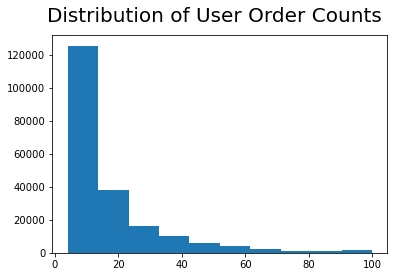

In [98]:
import matplotlib.pyplot as plt

print("Median number of orders: ", orders_per_user.order_id.median())
fig = plt.figure()
plt.hist(orders_per_user)
fig.suptitle("Distribution of User Order Counts", fontsize=20)

In [100]:
df_train_2

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,6129,24852,1,1,38907,train,7,1,14,30.0
1,6129,48364,2,1,38907,train,7,1,14,30.0
2,6129,21903,3,1,38907,train,7,1,14,30.0
3,6129,7806,4,1,38907,train,7,1,14,30.0
4,6129,27966,5,1,38907,train,7,1,14,30.0
...,...,...,...,...,...,...,...,...,...,...
1384612,3420084,21783,18,1,9808,train,9,6,21,30.0
1384613,3420084,40228,19,1,9808,train,9,6,21,30.0
1384614,3420084,47935,20,0,9808,train,9,6,21,30.0
1384615,3420084,9491,21,0,9808,train,9,6,21,30.0


(array([555793.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 828824.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

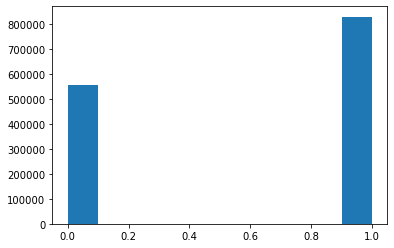

In [101]:
plt.hist(df_train_2.reordered)

(array([13307953.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 19126536.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

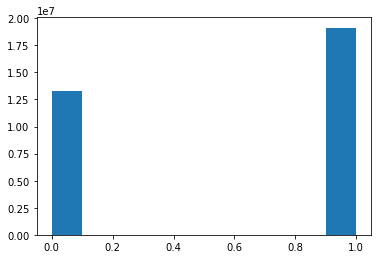

In [102]:
plt.hist(df_prior_2.reordered)